In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../')
from package_global_functions import *

# same function as in plot_evos.py
def getTimeEvosPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/evo_to_stationary/time_evos_dif_cond'
    else:
        path = '/time_evos_dif_cond'
    return path

In [27]:
# N, pi1, pi2, q1, q2, l = 100, 0.2, 0.2, 7, 10, 0.5
N, pi1, pi2, q1, q2, l = 5000, 0.2, 0.2, 7, 10, 0.6
# get the dataframes with the time evolutions:
folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
dfs = [pd.read_csv(file) for file in files]

In [3]:
df = dfs[1]

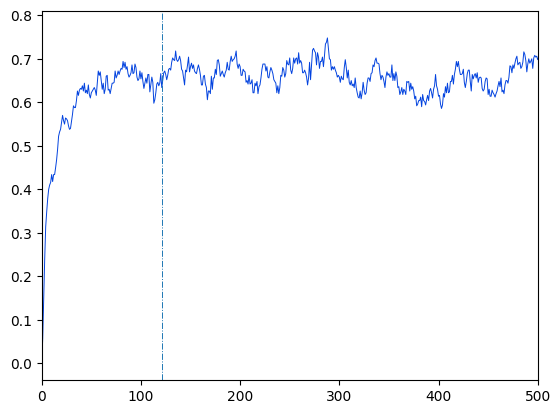

In [33]:
fig, ax = plt.subplots()
ax.plot(df['iter'], df['f2'], lw=0.7, marker=None, color='xkcd:blue')
ax.set(xlim=(0,500))
ax.axvline(121, ls='-.', lw=0.7)

## Block average f2 to get convergence time

In [11]:
w = 10*2 # block size
block_avgs = [np.average(df['f2'].iloc[i:i+w]) for i in range(0, len(df), w)]

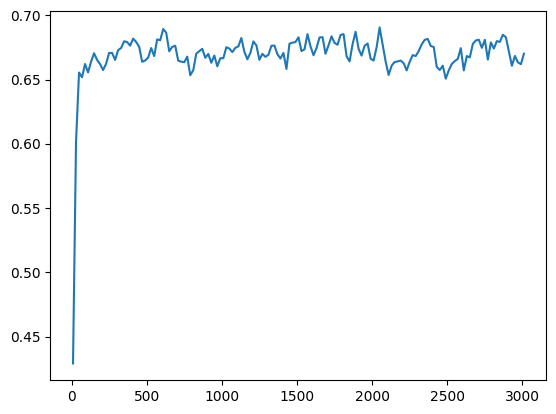

In [12]:
fig, ax = plt.subplots()
times = [w*i+w/2 for i in range(len(block_avgs))]
ax.plot(times, block_avgs)

In [13]:
# average difference tolerance
t = 0.001
for i, bavg, bavg2 in zip(range(len(block_avgs[:-1])), block_avgs[:-1], block_avgs[1:]):
    if abs(bavg - bavg2) < t:
        print(f'Stationary time between blocks {i} and {i+1}.')
        print(f'This is, between times {i*w} and {(i+1)*w+w}')
        break


Stationary time between blocks 12 and 13.
This is, between times 240 and 280


In [14]:
# compute the differences between blocks:
block_avgs_diff = [abs(bavg - bavg2) for bavg,bavg2 in zip(block_avgs[:-1], block_avgs[1:])]

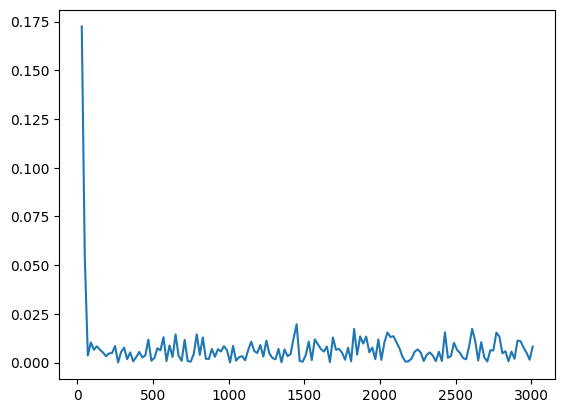

In [15]:
fig, ax = plt.subplots()
ax.plot(times[1:], block_avgs_diff)

[None]

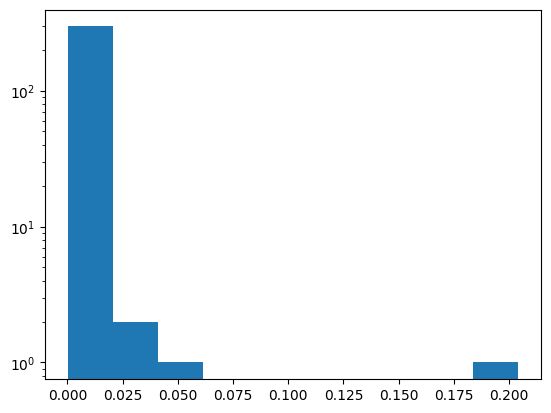

In [10]:
fig, ax = plt.subplots()
ax.hist(block_avgs_diff)
ax.set(yscale='log')

## F2 difference with last block

In [32]:
# testing for one dataframe
w = 10
t = 0.0005
for i in range(len(df)-w):
    block_avg = np.average(df['f2'].iloc[i:i+w])
    if abs(df['f2'].iloc[i+w+1] - block_avg) < t:
        print(f'Stationary at {i+w+1}')
        print(abs(df['f2'].iloc[i+w+1] - block_avg))
        break

Stationary at 121
0.000200000000000089


In [4]:
def search_time(w,t,evo):
    time = float('nan')
    for i in range(len(evo)-w):
        block_avg = np.average(evo[i:i+w])
        if abs(evo[i+w+1] - block_avg) < t:
            time = i+w+1
            break
    return time

### Stationary time from the raw time evolution

Average stationary time 63.6 +- 9.09065454189081


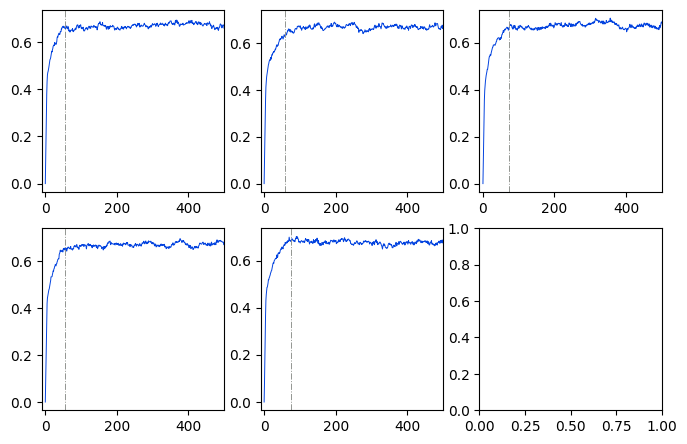

In [28]:
w = 10 # block size
t = 0.0005 # tolerance

fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
dfs2 = [[dfs[0], dfs[1], dfs[2]], [dfs[3], dfs[4]]]
times = []
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            continue
        else:
            ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue')
            ax[i,j].set(xlim=(-10,500))
            time = search_time(w, t, dfs2[i][j]['f2'])
            times.append(time)
            ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

Average stationary time 195.2 +- 44.37296474205887


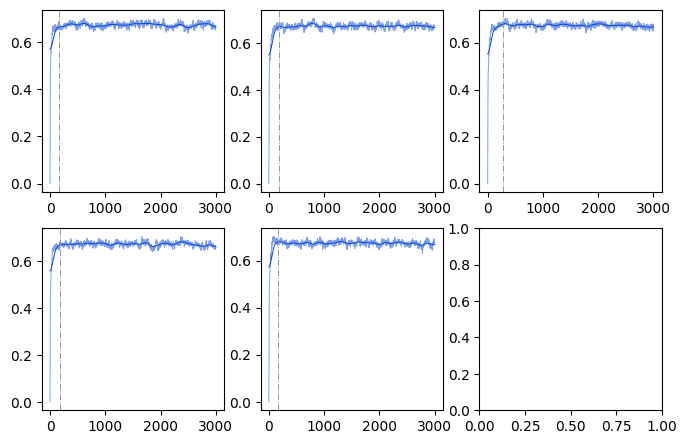

In [29]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 50

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            continue
        else:
            filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
            ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
            ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
            # ax[i,j].set(xlim=(-10,500))
            time = search_time(w, t, filtered_f2)
            times.append(time)
            ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

Average stationary time 93.4 +- 19.345283662949996


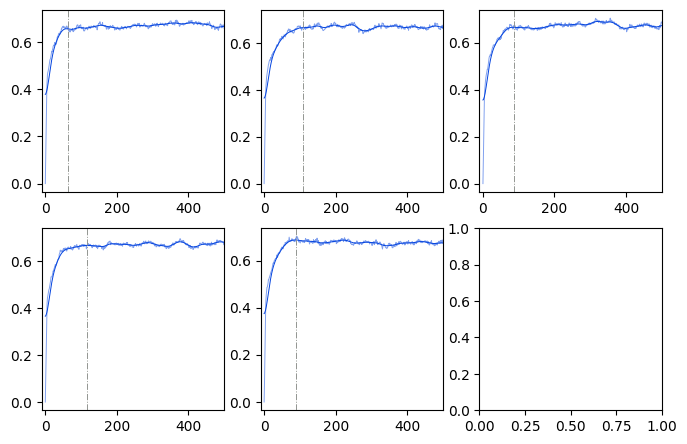

In [30]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 10

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            continue
        else:
            filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
            ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
            ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
            ax[i,j].set(xlim=(-10,500))
            time = search_time(w, t, filtered_f2)
            times.append(time)
            ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

Average stationary time 76.8 +- 11.702991070662236


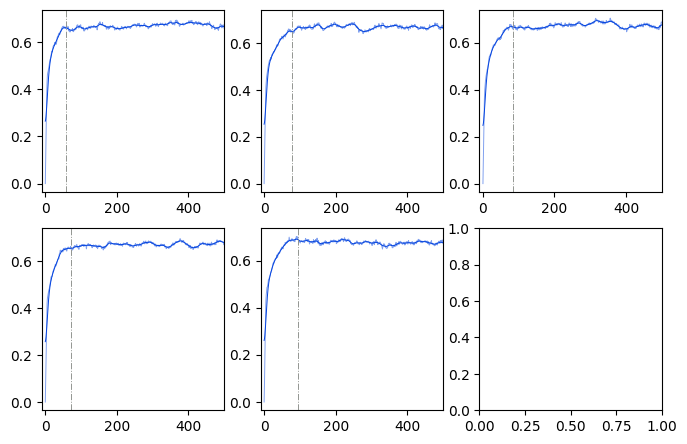

In [31]:
from scipy.ndimage import gaussian_filter, gaussian_filter1d
w = 10 # block size
t = 0.0005 # tolerance

# Gaussian filter sigma:
sig = 5

times = []
fig, ax = plt.subplots(2,3, figsize=(8.0, 5.2))
for i in range(2):
    for j in range(3):
        if i==1 and j==2:
            continue
        else:
            filtered_f2 = gaussian_filter1d(dfs2[i][j]['f2'], sigma=sig)
            ax[i,j].plot(dfs2[i][j]['iter'], dfs2[i][j]['f2'], lw=0.7, color='xkcd:blue', alpha=0.5)
            ax[i,j].plot(dfs2[i][j]['iter'], filtered_f2, lw=0.7, color='xkcd:blue')
            ax[i,j].set(xlim=(-10,500))
            time = search_time(w, t, filtered_f2)
            times.append(time)
            ax[i,j].axvline(time, lw=0.7, color='xkcd:gray', ls='-.')
print(f'Average stationary time {np.average(times)} +- {np.std(times)}')

### comparison of times, fix pis, qs; varying lambda

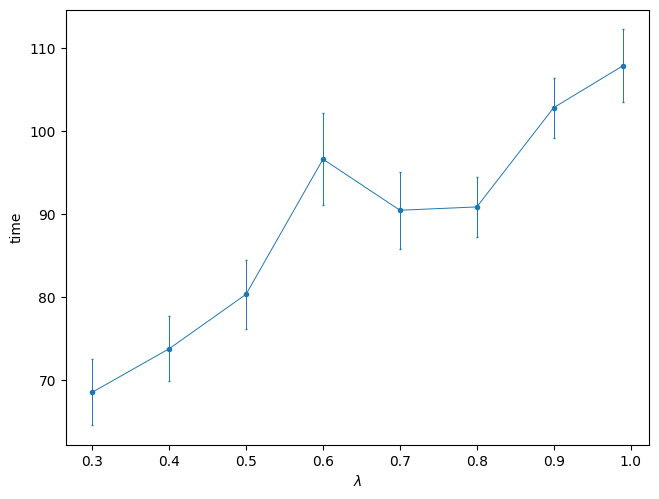

In [43]:
%matplotlib inline

lambs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
N, pi1, pi2, q1, q2 = 5000, 0.1, 0.1, 7, 10

times_l, times_l_sigma = [], []
for l in lambs:
    # get the dataframes with the time evolutions:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    # print(len(dfs))
    times = []
    for df in dfs:
        time = search_time(w=10, t=0.0005, evo=df['f2'])
        times.append(time)
    times_l.append(np.average(times)), times_l_sigma.append(np.std(times)/np.sqrt(len(dfs)))

fig, ax = plt.subplots()
ax.errorbar(lambs, times_l, times_l_sigma, capsize=1.0, elinewidth=0.7, lw=0.7, marker='.')
ax.set(xlabel='$\lambda$', ylabel='time')
fig.tight_layout(pad=0.02)


### comparison of times, fix pis, lambda, q2; varying q1

<ErrorbarContainer object of 3 artists>

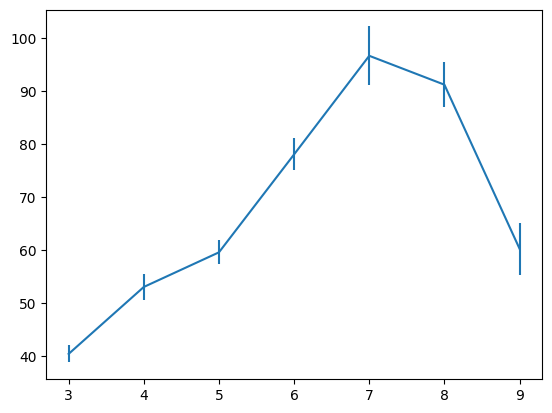

In [38]:
N, pi1, pi2, q2, l = 5000, 0.1, 0.1, 10, 0.6

q1s = [3,4,5,6,7,8,9]
times_q1, times_q1_sigma = [], []
for q1 in q1s:
    # get the dataframes with the time evolutions:
    folder = f'time_evo_csv_N_{N}_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}_l_{l}'
    files = glob.glob(f'{getTimeEvosPath()}/{folder}/*')
    dfs = [pd.read_csv(file) for file in files]
    times = []
    for df in dfs:
        time = search_time(w=10, t=0.0005, evo=df['f2'])
        times.append(time)
    times_q1.append(np.average(times)), times_q1_sigma.append(np.std(times)/np.sqrt(len(dfs)))

fig, ax = plt.subplots()
ax.errorbar(q1s, times_q1, times_q1_sigma)